In [2]:
from collections import Counter
import os
import pandas as pd
from gensim.models import Phrases, phrases
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from collections import Counter
from clusteringFunctions import getTexts

def getgrams(txt):
    infile = open(txt,'r')
    lines = infile.readlines()
    infile.close()
    allgrams = []
    for line in lines: 
        line = line.split(':')
        ngrams = line[1].strip()
        if '_' in ngrams: 
                ngrams = ngrams.strip().split(' ')
                for n in ngrams:
                        allgrams.append(n)
        else: continue
    return allgrams 

def wordcloud(counts,title,mask,maskable_image, colormap):
    if mask: 
        word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=200, mask = maskable_image, colormap=colormap, collocations=False).generate_from_frequencies(counts)
    else: 
        word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=200, collocations=True).generate_from_frequencies(counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title,fontsize=20)
    plt.show()

In [3]:
csv_data = pd.read_csv('/Users/amycweng/Digital Humanities/sermons.csv')
tcpIDs = [ _ for _ in csv_data['id']]
bigramdata = getTexts('/Users/amycweng/Digital Humanities/charityTXT',tcpIDs)
bigramtexts = list(bigramdata.values())
bigramnames = list(bigramdata.keys())
print(len(bigramnames))
''' 
Gets bigrams and trigrams that appear at least TWICE

https://radimrehurek.com/gensim_3.8.3/models/phrases.html 
'''
training = []
for t in bigramtexts:
    words = t.split(' ')
    training.append(words)

bigrammodel = Phrases(training, min_count=2, threshold= 0, scoring='npmi', connector_words=phrases.ENGLISH_CONNECTOR_WORDS)
print('bigram model trained')
trigrammodel = Phrases(bigrammodel[training], min_count=2, threshold= 0, scoring='npmi', connector_words=phrases.ENGLISH_CONNECTOR_WORDS)
print('trigram model trained')

70
bigram model trained
trigram model trained


In [8]:
'''For charity texts''' 
groups = {0: 'charity|charitable|charitie', 
        1: 'beneficience|bequeath|bestow|liberality|benevolence|goodwill| alm | almes |kindness|almsdeed',
        2: 'poor|poverty|rich|wealthy|wealth|beggar|orphan|needy|labourer|impotent|bankrup|penury|meanness|prosperity|bounty|impouerish|impoverish',
        3: 'rate|usury|usurer|money|commodity|talon|talent|coin|bullion|exchange|shilling|farthing| pound |penny|purchase',
        4: 'credit|creditor|loan|lend',
        5: ' debt|debtor|borrow|pledge|pawn',
        6: 'industry|industrious|thrift|labor|labour|occupation|profit|profitable|commodious',
        7: 'prison|imprisonment',
        8: 'hospital|almshouse|orphanage',
        9: 'city|citizen|london',
        10: 'vagrant|vagrancy'
        }
searchwords = []
for part in groups.values(): 
    searchwords.extend([word.strip() for word in part.split('|')])
# '''For plays''' 
# searchwords = ['credit','creditors','loan','lending','lend','new','nevv','novelty','novel',
#     'nouel','nouelty','nouelties','novelties','profits','profit',
#     'wealth','vvealth','merit','commodity','commoditie','money',
#     'monies','thrift','thrifty','industry'
# ]
gramDict = {}
gramFreqs = {}
for key in searchwords: 
    gramDict[key] = []
    gramFreqs[key] = 0
    
name = 'charity'
# name = 'plays'
storeGramFile = open(f'gramsEach{name}Text.txt','w')
count = 0
for idx, text in enumerate(bigramtexts):
    #for outputting to txt file, specify here
    textGrams = []
    text = text.strip().split(' ')
    bgcount = Counter(b for b in bigrammodel[text] if len(b.split("_")) > 1)
    tgcount = Counter(t for t in trigrammodel[text] if len(t.split("_")) > 2)
    for gram,freq in dict(bgcount).items():
        for s in searchwords: 
            if s in gram.split('_'):
                gramDict[s].append(gram)
                gramFreqs[s] += freq
                textGrams.append(gram)

    storeGramFile.write(f'{bigramnames[idx]}: {" ".join(textGrams)}\n')
    count += 1
    if count%10 == 0:
        print(count, "files processed")
storeGramFile.close()
with open(f'{name}Grams.txt', 'w+') as outfile: 
    for s in searchwords: 
        outfile.write(f"{s}: {gramFreqs[s]} occurrences\n\t\t{' '.join(gramDict[s])}\n")

print('processing complete')

10 files processed
20 files processed
30 files processed
40 files processed
50 files processed
60 files processed
70 files processed
processing complete


In [9]:
''' 
Mask creation code from this tutorial: https://www.holisticseo.digital/python-seo/word-cloud/
'''
import numpy as np 
from PIL import Image
mask = np.array(Image.open('/Users/amycweng/Digital Humanities/Early-Modern-London/Other_Files/heart.png'))
def transform_zeros(val):
    if val == 0:
        return 255
    else: 
        return val
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

[('be_rich', 28), ('bestow_upon', 24), ('rich_man', 23), ('poor_man', 20), ('be_bestow', 20), ('be_poor', 19), ('his_labour', 17), ('labour_to_have', 16), ('our_labour', 16), ('bestow_it', 14), ('he_bestow', 14), ('be_profitable', 13), ('we_labour', 13), ('have_bestow', 13), ('wealth_be', 13), ('he_labour', 13), ('must_labour', 13), ('into_prison', 13), ('your_labour', 12), ('his_poor', 12), ('make_rich', 12), ('poor_soul', 12), ('labour_not', 11), ('his_wealth', 11), ('high_rate', 11), ('thy_wealth', 11), ('not_profit', 10), ('much_labour', 10), ('this_city', 10), ('their_labour', 10), ('his_money', 9), ('bestow_on_he', 9), ('they_labour', 9), ('rich_as', 9), ('our_debt', 9), ('poor_in_spirit', 9), ('this_poor', 9), ('man_rich', 9), ('bestow_on_they', 9), ('his_credit', 9), ('therefore_labour', 9), ('bestow_they', 9), ('their_credit', 9), ('their_wealth', 9), ('be_in_prison', 9), ('love_kindness', 8), ('their_money', 8), ('bestow_his', 8), ('rich_or_poor', 8), ('it_profit', 8)]


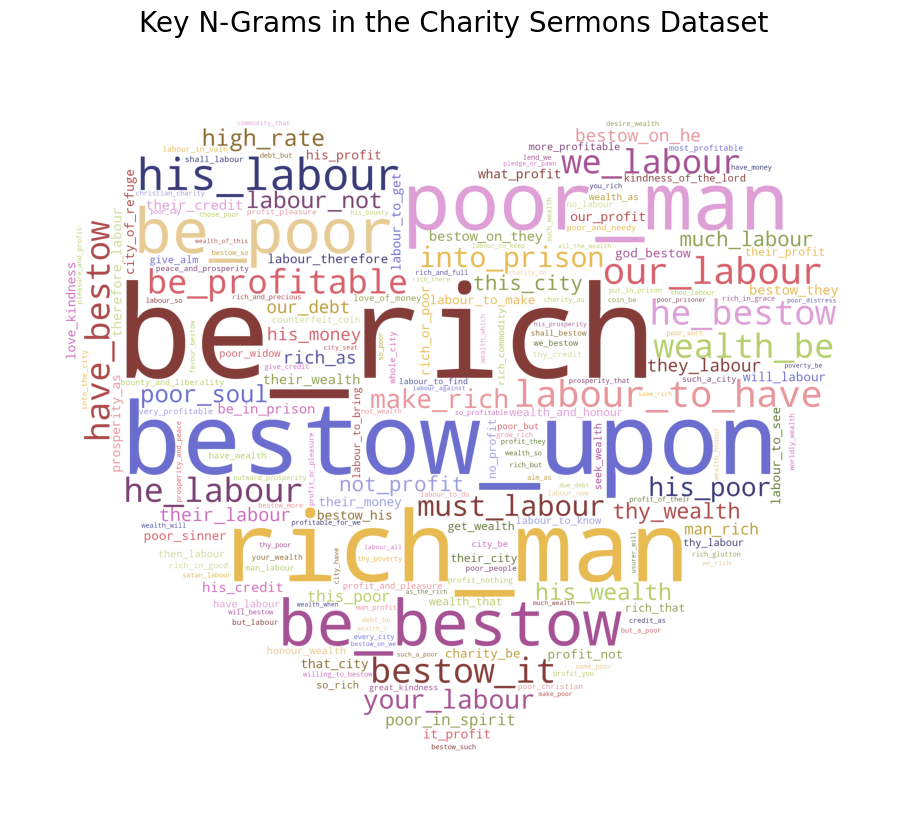

In [14]:
charitygrams = getgrams('gramsEachcharityText.txt')
counts = Counter(charitygrams)
print(counts.most_common(n=50))
wordcloud(counts,"Key N-Grams in the Charity Sermons Dataset",True,maskable_image,'tab20b')